feature extraction+feture selection when we have only two classes in given target feature

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('csgo_round_snapshots (1).csv')

In [16]:
df.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

In [17]:
df.shape

(122410, 97)

In [18]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [20]:
df['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [21]:
counts=df['map'].value_counts()
total=counts.sum()
percentages=counts/total*100
percentages

de_inferno     19.451842
de_dust2       18.090025
de_nuke        15.542031
de_mirage      15.175231
de_overpass    11.503145
de_train       11.021158
de_vertigo      9.098113
de_cache        0.118454
Name: map, dtype: float64

Text(0, 0.5, 'counts')

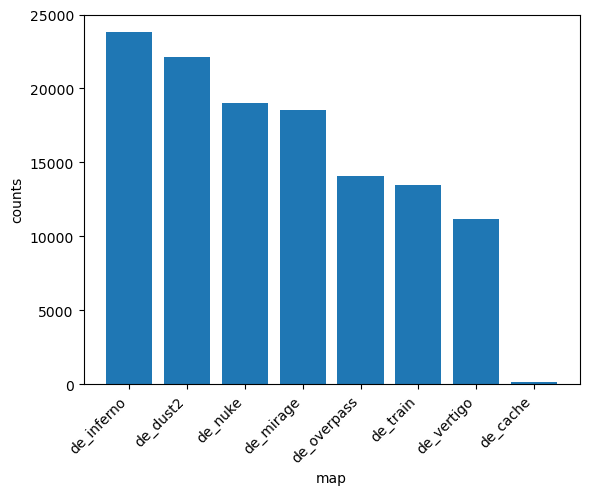

In [22]:
plt.bar(counts.index,counts.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel("map")
plt.ylabel("counts")

In [23]:
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [24]:
df.isnull().sum().sum()

0

In [25]:
#label encoding with astype or label encoding or pd.to_numeric()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['map']= label_encoder.fit_transform(df['map'])
df['round_winner']= label_encoder.fit_transform(df['round_winner'])
df['bomb_planted']= label_encoder.fit_transform(df['bomb_planted'])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int32  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [27]:
df.isnull().sum().sum()

0

In [28]:
x=df.drop(columns=["round_winner"])
y=df["round_winner"]
x

time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
0          175.00       0.0      0.0    1             0      500.0     500.0   
1          156.03       0.0      0.0    1             0      500.0     500.0   
2           96.03       0.0      0.0    1             0      391.0     400.0   
3           76.03       0.0      0.0    1             0      391.0     400.0   
4          174.97       1.0      0.0    1             0      500.0     500.0   
...           ...       ...      ...  ...           ...        ...       ...   
122405      15.41      11.0     14.0    6             1      200.0     242.0   
122406     174.93      11.0     15.0    6             0      500.0     500.0   
122407     114.93      11.0     15.0    6             0      500.0     500.0   
122408      94.93      11.0     15.0    6             0      500.0     500.0   
122409      74.93      11.0     15.0    6             0      375.0     479.0   

        ct_armor  t_armor  ct_money  ...  ct_grenade_flashbang  \
0            0.0      0.0    4000.0  ...                   0.0   
1          400.0    300.0     600.0  ...                   0.0   
2          294.0    200.0     750.0  ...                   0.0   
3          294.0    200.0     750.0  ...                   0.0   
4          192.0      0.0   18350.0  ...                   0.0   
...          ...      ...       ...  ...                   ...   
122405     195.0    359.0     100.0  ...                   1.0   
122406      95.0    175.0   11500.0  ...                   1.0   
122407     495.0    475.0    1200.0  ...                   4.0   
122408     495.0    475.0    1200.0  ...                   1.0   
122409     395.0    466.0    1100.0  ...                   0.0   

        t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                       0.0                      0.0                     0.0   
1                       0.0                      0.0                     2.0   
2                       0.0                      0.0                     2.0   
3                       0.0                      0.0                     0.0   
4                       0.0                      0.0                     0.0   
...                     ...                      ...                     ...   
122405                  2.0                      1.0                     1.0   
122406                  2.0                      1.0                     0.0   
122407                  4.0                      3.0                     5.0   
122408                  5.0                      0.0                     3.0   
122409                  3.0                      0.0                     2.0   

        ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                                0.0                          0.0   
1                                0.0                          0.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                0.0                          0.0   
...                              ...                          ...   
122405                           0.0                          0.0   
122406                           0.0                          0.0   
122407                           1.0                          0.0   
122408                           0.0                          0.0   
122409                           0.0                          0.0   

        ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
...                           ...                       ...   
122405                 

In [29]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [33]:
lda.transform(X_test)

array([[-0.31315742],
       [ 0.17220794],
       [-2.19396512],
       ...,
       [ 2.91622983],
       [-1.65244457],
       [ 0.99731671]])

In [34]:
X_test

array([[ 1.41162429,  0.89004314, -0.57652183, ..., -0.81369161,
        -0.15804328,  5.82498722],
       [-0.05617118,  0.26519743, -0.57652183, ..., -0.81369161,
        -0.15804328, -0.15811902],
       [-1.52341656,  1.51488885,  0.66709308, ..., -0.21372179,
        -0.15804328, -0.15811902],
       ...,
       [-1.5232332 , -1.4010578 , -1.19832928, ..., -0.81369161,
        -0.15804328, -0.15811902],
       [-0.05617118, -1.19277589, -1.40559843, ..., -0.81369161,
         5.9256289 , -0.15811902],
       [ 1.41034077,  0.05691553,  1.28890053, ..., -0.81369161,
        -0.15804328, -0.15811902]])

In [35]:
lda_coefficients = np.exp(np.abs(lda.coef_))

In [36]:
lda_coefficients.flatten()

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
       1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
       1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
       1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
       1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
       1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
       1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
       1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
       1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
       1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
       1.0223457 , 1.00392739, 1.00787732, 1.06560713, 1.02458

In [37]:
num_features=x.shape[1]

In [38]:
num_features

96

In [39]:
feature_indices=list(x.columns)
feature_indices

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

In [40]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [59]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# Create a list of categorical features (you need to specify these)
categorical_features = ['map']  # Add other categorical features if needed

# Preprocessing using ColumnTransformer and Pipeline
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Define transformations for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Use drop='first' to avoid multicollinearity
])



In [60]:
# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test)



In [66]:
# Create pipelines for each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}


   

In [65]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_preprocessed, y_train)
    
     # Make predictions
    y_pred = model.predict(X_test_preprocessed)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

    

C:\Users\Suren\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482

Model: Decision Tree
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     12004
           1       0.82      0.83      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482

Model: Random Forest
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     12004
           1       0.89      0.87      0.88     124